In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import re
import keras as k
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [4]:
churn_data = pd.read_csv('/home/elliot/PycharmProjects/CSC 495 - Telecom Customer Churn/Datasets/telecom_churn_Processed.csv')
churn_data = churn_data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [5]:
X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)


In [7]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC()))
models.append(('K-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('XGBoost', XGBClassifier(verbosity=0)))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Naive Bayes', GaussianNB()))

In [8]:
model_names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
    scores.append(score)
    model_names.append(name)
    print(f"Mean of the {name} model scores : {score.mean()}")


Mean of the Logistic Regression model scores : 0.802474783395836
Mean of the Support Vector Machine model scores : 0.7342149715504979
Mean of the K-Nearest Neighbor model scores : 0.6855762236518815
Mean of the Decision Tree model scores : 0.7140194620457778
Mean of the Random Forest model scores : 0.7979212466054572
Mean of the XGBoost model scores : 0.7451656051985
Mean of the Gradient Boosting model scores : 0.7511307060649167
Mean of the Naive Bayes model scores : 0.6942510991853097


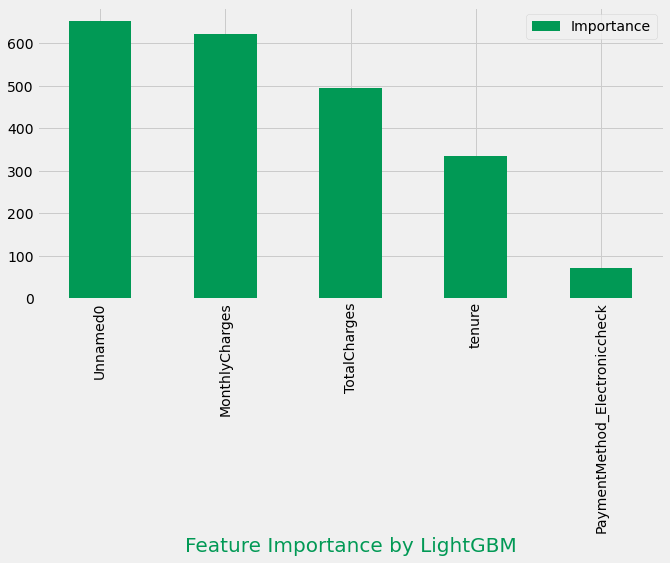

In [9]:
feature_importance = pd.DataFrame({'Importance' : LGBMClassifier().fit(X,y).feature_importances_}, index = X.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#019955', figsize = (10, 5))
plt.xlabel("Feature Importance by LightGBM", color = "#019955", fontdict= {"fontsize" : 20});
